In [68]:
import pandas as pd
import calendar
from pandas import Series

df = pd.read_csv('data.csv')

Eliminando atributos

In [69]:
del df['description']
del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']

Discriminando data

In [70]:
df = df.loc[df['l2'] == 'Capital Federal']
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
df = df.loc[df['currency'] == 'USD']
# hay datos de 2020 y 2021
# nos quedamos con los datos del año 2020
df = df.loc[df['created_on'] < '2021-01-01 00:00:00']
del df['property_type']
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,operation_type
436,Propiedad,2020-12-27,2021-05-03,2020-12-27,NaN,NaN,Argentina,Capital Federal,Flores,NaN,1.0,NaN,1.0,24.0,22.0,47500.0,USD,Venta
443,Propiedad,2020-12-27,9999-12-31,2020-12-27,-34.613368,-58.385273,Argentina,Capital Federal,Monserrat,NaN,1.0,NaN,1.0,36.0,33.0,93000.0,USD,Venta
446,Propiedad,2020-12-27,9999-12-31,2020-12-27,-34.576850,-58.497310,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,1.0,34.0,30.0,89000.0,USD,Venta
447,Propiedad,2020-12-27,9999-12-31,2020-12-27,-34.611572,-58.478802,Argentina,Capital Federal,Villa del Parque,NaN,1.0,NaN,1.0,47.0,42.0,107000.0,USD,Venta
462,Propiedad,2020-12-27,2021-01-01,2020-12-27,-34.561266,-58.474941,Argentina,Capital Federal,Coghlan,NaN,1.0,0.0,1.0,NaN,NaN,74000.0,USD,Venta


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86326 entries, 436 to 999983
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          86326 non-null  object 
 1   start_date       86326 non-null  object 
 2   end_date         86326 non-null  object 
 3   created_on       86326 non-null  object 
 4   lat              79849 non-null  float64
 5   lon              79839 non-null  float64
 6   l1               86326 non-null  object 
 7   l2               86326 non-null  object 
 8   l3               85882 non-null  object 
 9   l4               4100 non-null   object 
 10  rooms            83293 non-null  float64
 11  bedrooms         70425 non-null  float64
 12  bathrooms        82322 non-null  float64
 13  surface_total    65125 non-null  float64
 14  surface_covered  65437 non-null  float64
 15  price            86326 non-null  float64
 16  currency         86326 non-null  object 
 17  operation

Transform & clean

In [5]:
def divide_by_one_thounsans(x):
    return x / 1000


df['created_on'] = pd.to_datetime(df['created_on'])
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)
df['price'] = df['price'].apply(divide_by_one_thounsans)


<AxesSubplot:>

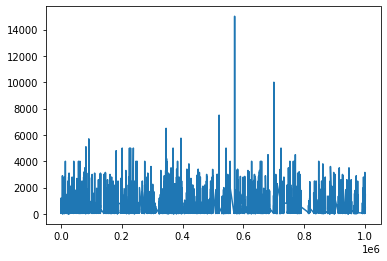

In [6]:
#import matplotlib.pyplot as plt
df['price'].plot()

<AxesSubplot:>

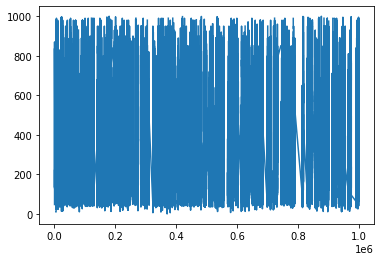

In [7]:
df['price'] = df['price'].loc[df['price'] < 1000]
df['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

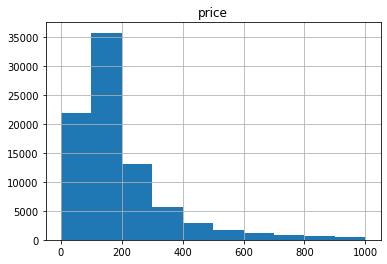

In [8]:
df.hist(column='price')

<AxesSubplot:>

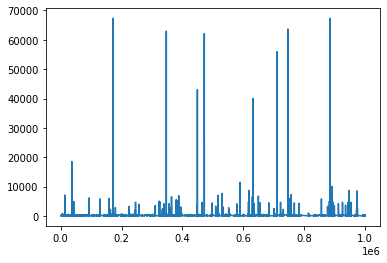

In [9]:
df['surface_covered'].plot()

<AxesSubplot:>

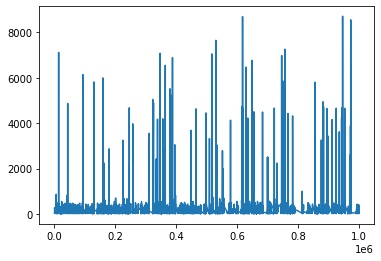

In [10]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 10000]
df['surface_covered'].plot()

<AxesSubplot:>

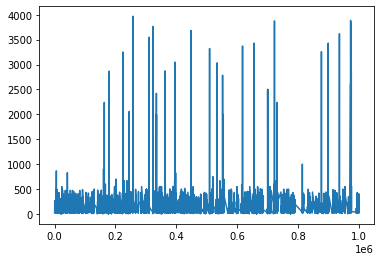

In [11]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 4000]
df['surface_covered'].plot()

<AxesSubplot:>

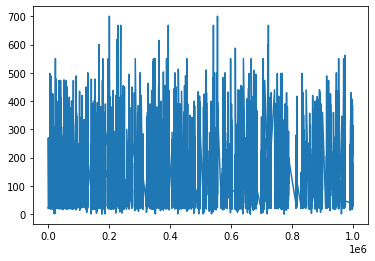

In [12]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 750]
df['surface_covered'].plot()

<AxesSubplot:>

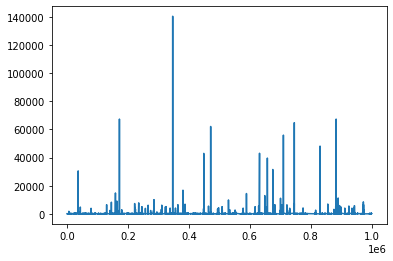

In [13]:
df['surface_total'].plot()

<AxesSubplot:>

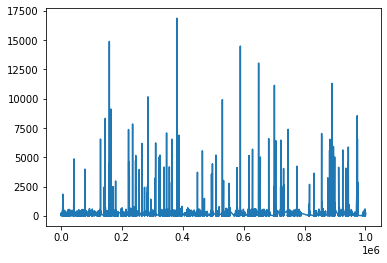

In [14]:
df['surface_total'] = df['surface_total'].loc[df['surface_total'] < 20000]
df['surface_total'].plot()

<AxesSubplot:xlabel='surface_covered'>

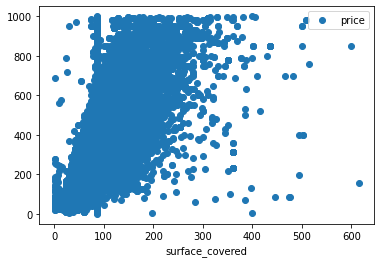

In [15]:
df.plot(x='surface_covered', y='price', style='o')

<AxesSubplot:xlabel='surface_total'>

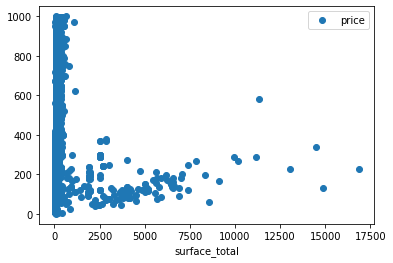

In [16]:
df.plot(x='surface_total', y='price', style='o')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86326 entries, 436 to 999983
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ad_type          86326 non-null  object        
 1   start_date       86326 non-null  object        
 2   end_date         86326 non-null  object        
 3   created_on       86326 non-null  datetime64[ns]
 4   lat              79849 non-null  float64       
 5   lon              79839 non-null  float64       
 6   l1               86326 non-null  object        
 7   l2               86326 non-null  object        
 8   l3               85882 non-null  object        
 9   l4               4100 non-null   object        
 10  rooms            86326 non-null  float64       
 11  bedrooms         86326 non-null  float64       
 12  bathrooms        82322 non-null  float64       
 13  surface_total    86313 non-null  float64       
 14  surface_covered  86212 non-null  fl

### ¿Cómo influye la comuna en el precio por m2?

In [90]:
# corren antes de "Transform & clean"
df['surface_total'].fillna((df['surface_total']), inplace=True)
df['price'].fillna((df['price']), inplace=True)

df["price_usd_per_m2"] = df["price"] / df["surface_total"]

In [92]:
def getComunaByBarrio(x):
    comuna1 = ['Retiro','San Nicolás','Puerto Madero','San Telmo','Montserrat', 'Constitución']
    comuna2 = ['Recoleta']
    comuna3 = ['Balvanera','San Cristóbal']
    comuna4 = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya']
    comuna5 = ['Almagro', 'Boedo']
    comuna6 = ['Caballito']
    comuna7 = ['Flores','Parque Chacabuco']
    comuna8 = ['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano']
    comuna9 = ['Liniers', 'Mataderos', 'Parque Avellaneda']
    comuna10 = ['Villa Real', 'Monte Castro', 'Versalles', 'Floresta','Vélez Sarsfield','Villa Luro']
    comuna11 = ['Villa General Mitre', 'Villa Devoto', 'Villa del Parque', 'Villa Santa Rita']
    comuna12 = ['Coghlan', 'Saavedra', 'Villa Urquiza','Villa Pueyrredón']
    comuna13 = ['Núñez', 'Belgrano', 'Colegiales']
    comuna14 = ['Palermo']
    comuna15 = ['Chacarita', 'Villa Crespo', 'La Paternal','Villa Ortúzar', 'Agronomía', 'Parque Chas']
    
    if x in comuna1:
        return 'COMUNA 1'
    elif x in comuna2:
        return 'COMUNA 2'
    elif x in comuna3:
        return 'COMUNA 3'
    elif x in comuna4:
        return 'COMUNA 4'
    elif x in comuna5:
        return 'COMUNA 5'
    elif x in comuna6:
        return 'COMUNA 6'
    elif x in comuna7:
        return 'COMUNA 7'
    elif x in comuna8:
        return 'COMUNA 8'
    elif x in comuna9:
        return 'COMUNA 9'
    elif x in comuna10:
        return 'COMUNA 10'
    elif x in comuna11:
        return 'COMUNA 11'
    elif x in comuna12:
        return 'COMUNA 12'
    elif x in comuna13:
        return 'COMUNA 13'
    elif x in comuna14:
        return 'COMUNA 14'
    elif x in comuna15:
        return 'COMUNA 15'
    
      

In [93]:
df['COMUNA'] = df['l3'].apply(getComunaByBarrio)

In [94]:
df['COMUNA'].describe

<bound method NDFrame.describe of 436        COMUNA 7
443            None
446       COMUNA 12
447       COMUNA 11
462       COMUNA 12
            ...    
999956    COMUNA 11
999957    COMUNA 12
999978    COMUNA 13
999981    COMUNA 12
999983    COMUNA 11
Name: COMUNA, Length: 86326, dtype: object>

In [51]:
import matplotlib.pyplot as plt
def get_top_places(df, num, cheapest):
    return df.groupby(['COMUNA'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_top_places(df, num, cheapest,colour,title):
    graph = get_top_places(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=15)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=18)
    graph.set_xlabel("USD/m2", fontsize=18)
    plt.show()

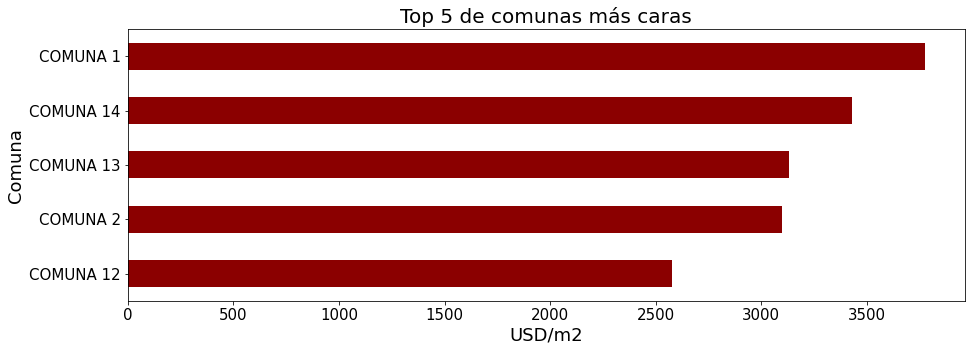

In [53]:
plot_top_places(df,5, False,'darkred',"Top 5 de comunas más caras")

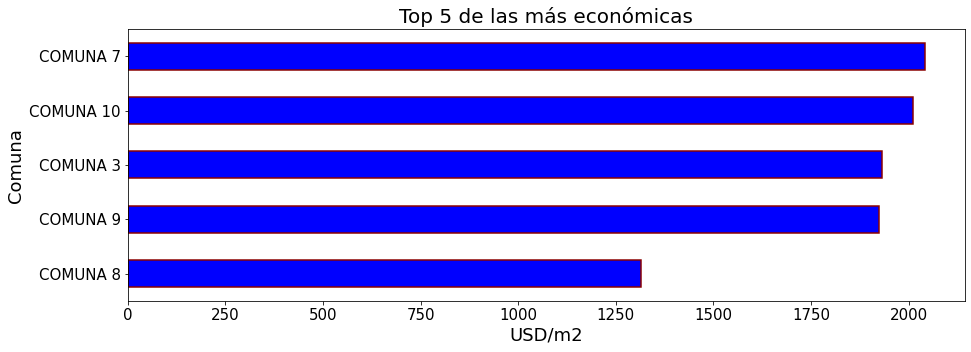

In [57]:
top5_cheap_CABA = get_top_places(df,5, True)
graph4 = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='darkred',lineWidth = 1.5,fontsize=15)
graph4.set_title("Top 5 de las más económicas", fontsize=20)
graph4.set_ylabel("Comuna", fontsize=18)
graph4.set_xlabel("USD/m2", fontsize=18)
plt.show()

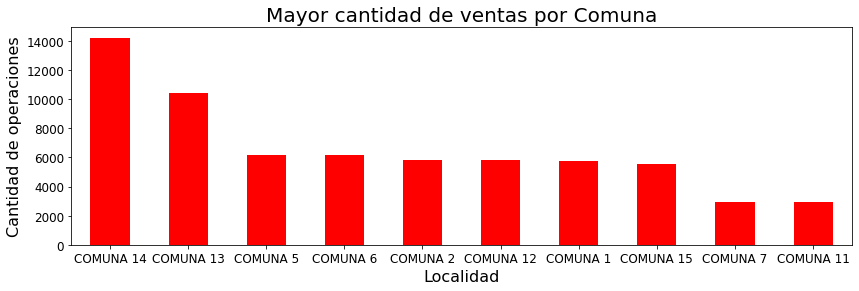

In [100]:
# Mayor cantidad de ventas por comuna
df['COMUNA'].value_counts().head(10).plot(kind='bar',rot=0, figsize=(14,4), color='red' ,fontsize=12);
plt.title('Mayor cantidad de ventas por Comuna', fontsize=20);
plt.xlabel('Localidad', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [ ]:
# comuna 14 = ['Palermo']
# comuna 13 = ['Núñez', 'Belgrano', 'Colegiales']
# comuna 5 = ['Almagro', 'Boedo']

In [83]:
#Analizamos la cantidad de ventas para cada mes en todo el año

df['created_on'] = pd.to_datetime(df['created_on'])
df['year'] = df['created_on'].map(lambda x:x.year)
df['month'] = df['created_on'].map(lambda x:x.month)
df['day'] = df['created_on'].map(lambda x:x.day)

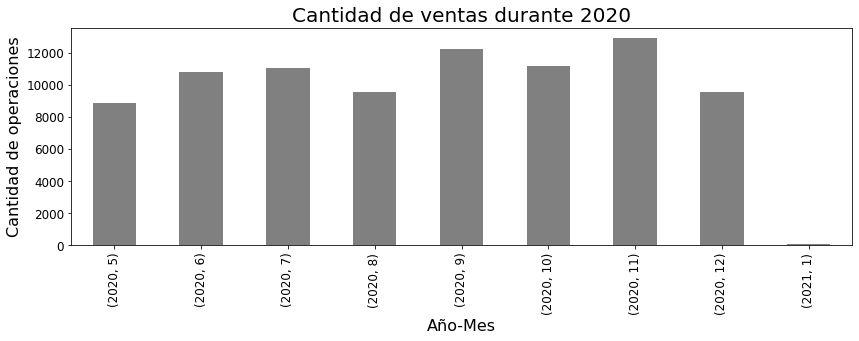

In [107]:
df.groupby(['year','month']).count()['created_on'].plot(kind='bar', rot = 90, figsize=(14,4), color='grey' ,fontsize=12)
plt.title('Cantidad de ventas durante 2020', fontsize=20);
plt.xlabel('Año-Mes', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);